## DIGIT RECOGNITION

In [140]:
import pandas as pd

In [141]:
digits = pd.read_csv(r"C:\Users\ADMIN\Desktop\Digits\hdigits.csv",names = ["p1","p2","p3","p4","p5","p6","p7","p8","p9","p10","p11","p12","p13","p14","p15","p16","p17","p18","p19","p20","p21","p22","p23","p24","p25","p26","p27","p28","p29","p30","p31","p32","p33","p34","p35","p36","p37","p38","p39","p40","p41","p42","p43","p44","p45","p46","p47","p48","p49","p50","p51","p52","p53","p54","p55","p56","p57","p58","p59","p60","p61","p62","p63","p64","digit"])

In [142]:
digits.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p56,p57,p58,p59,p60,p61,p62,p63,p64,digit
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [143]:
digits.shape

(5620, 65)

In [144]:
X_data = digits.drop(["digit"],axis=1)
y_data = digits["digit"]

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size = 0.25,random_state=1)

In [147]:
type(X_train)

pandas.core.frame.DataFrame

In [148]:
from sklearn import preprocessing

In [149]:
XX_train = preprocessing.scale(X_train)
XX_test = preprocessing.scale(X_test)

In [150]:
type(XX_train)

numpy.ndarray

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(XX_train,y_train)
Yp_knn = knn_model.predict(XX_test)

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
acc_knn = accuracy_score(Yp_knn,y_test)

In [154]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.0001)
svc_model = svc.fit(XX_train,y_train)
Yp_svc = svc_model.predict(XX_test)

In [155]:
acc_svm = accuracy_score(Yp_svc,y_test)

In [156]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (64,64,64,64),max_iter = 400)
mlp_model = mlp.fit(XX_train,y_train)
Yp_mlp = mlp_model.predict(XX_test)

In [157]:
acc_mlp = accuracy_score(Yp_mlp,y_test)

In [158]:
print("Accuracy of KNN : {} \nAccuracy of SVM : {} \nAccuracy of Neural Networks : {}".format(acc_knn,acc_svm,acc_mlp))

Accuracy of KNN : 0.9701067615658363 
Accuracy of SVM : 0.9231316725978648 
Accuracy of Neural Networks : 0.9729537366548042


In [159]:
from matplotlib import pyplot as plt
import numpy as np

In [160]:
scores = [acc_mlp,acc_knn,acc_svm]
scores = np.array(scores)
scores = scores*100
label = ["MLP", "KNN", "SVM"]

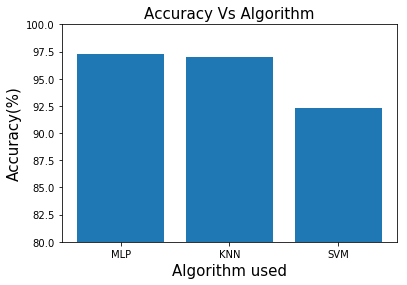

In [161]:
index = np.arange(len(label))
plt.bar(index, scores)
plt.xlabel('Algorithm used', fontsize=15)
plt.ylabel('Accuracy(%)', fontsize=15)
plt.xticks(index, label, fontsize=10)
plt.title('Accuracy Vs Algorithm',fontsize=15)
plt.ylim(80,100)
plt.show()

### Testing with unknown image

In [162]:
from scipy import misc

In [244]:
image = misc.imread("2.png")

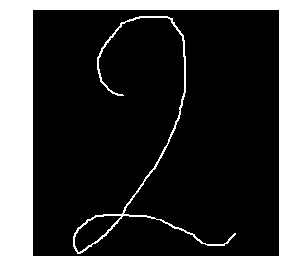

In [245]:
from skimage import io
from matplotlib import pyplot as plt
image1 = io.imshow(image)
plt.axis("off")
plt.show(image1)


In [246]:
image.shape

(256, 256, 3)

In [247]:
image_88 = misc.imresize(image,(8,8))

In [248]:
image_88 = image_88.astype(XX_train.dtype)

In [249]:
image_88.dtype

dtype('float64')

In [250]:
image_88 = misc.bytescale(image_88,high = 16,low = 0)

In [251]:
image_64 = []

In [252]:
for i in image_88:
    for j in i:
        image_64.append(sum(j)/3.0)

In [253]:
mlp_model.predict([image_64])

array([2], dtype=int64)